<a href="https://colab.research.google.com/github/UlVc/Lego-IP-s-cost/blob/main/Lego_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lego Price

How much does the customer pays for a non-Lego licensed theme? In this project we will answer this question. To do that, I spoke to the folks at [Brickset](https://brickset.com/) if they could pass me the database of all Lego sets that were released on 2020, and they kindly gave it to me. Thanks again [Brickset](https://brickset.com/)!

But why only the 2020? Well, we are talking about money, and as we all know, purchasing power varies from year to year, so I decided not to deal with those economic factors in this project.

##Installing necessary packages

In [119]:
!pip install plotly
!pip install statsmodels 

import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Reading the dataset

In [137]:
lego = pd.read_csv('lego2020.csv')

The dataset has a lot of columns that we will not use. Therefore, it will be cleaned up in the next section.

In [121]:
lego.columns

Index(['setID', 'number', 'numberVariant', 'name', 'year', 'theme',
       'themeGroup', 'subtheme', 'category', 'released', 'image/thumbnailURL',
       'image/imageURL', 'bricksetURL', 'collections/ownedBy',
       'collections/wantedBy', 'LEGOCom/US/retailPrice',
       'LEGOCom/US/dateFirstAvailable', 'LEGOCom/CA/retailPrice',
       'LEGOCom/CA/dateFirstAvailable', 'rating', 'reviewCount',
       'packagingType', 'availability', 'instructionsCount',
       'additionalImageCount', 'lastUpdated', 'pieces', 'ageRange/min',
       'dimensions/height', 'dimensions/width', 'dimensions/depth',
       'dimensions/weight', 'barcode/EAN', 'minifigs',
       'LEGOCom/UK/retailPrice', 'LEGOCom/UK/dateFirstAvailable',
       'LEGOCom/DE/retailPrice', 'LEGOCom/DE/dateFirstAvailable',
       'barcode/UPC', 'LEGOCom/US/dateLastAvailable',
       'LEGOCom/CA/dateLastAvailable', 'LEGOCom/UK/dateLastAvailable',
       'LEGOCom/DE/dateLastAvailable', 'ageRange/max'],
      dtype='object')

Right now we have 824 rows, which is not a huge amount of data, but still useful. Although the number of rows will probably be less when the data is cleaned up because values are missing.

In [148]:
lego.shape

(824, 44)

## Cleaning the dataset

As said above, we have a lot of columns that we don't need. For this proyect we will only need the number id of the set, the theme, the retail price at [Lego](https://www.lego.com/en-us) and the number of pieces.

Also, we don't want to deal with NaN values in columns of the retail price and pieces, so those rows with NaN values will be removed. The name of the column LEGOCom/US/retailPrice will be renamed to *price* so it's easier to work with.

In [144]:
lego_cleaned = lego.loc[:, ['number', 'theme', 'LEGOCom/US/retailPrice', 'pieces']]
lego_cleaned.dropna(subset=['LEGOCom/US/retailPrice', 'pieces'], inplace=True)
lego_cleaned.rename(columns={'LEGOCom/US/retailPrice': 'price'}, inplace=True)
lego_cleaned

,number,theme,price,pieces
1,30548,Miscellaneous,4.99,26.0
2,30368,City,4.99,33.0
3,41431,Friends,39.99,321.0
7,21324,Ideas,119.99,1368.0
8,76897,Speed Champions,19.99,250.0
...,...,...,...,...
810,77906,DC Comics Super Heroes,39.99,255.0
811,76157,DC Comics Super Heroes,39.99,371.0
814,10932,Duplo,59.99,56.0
817,71718,Ninjago,19.99,321.0


We ended with 456 rows (55\%), which is a thing that I don't like a lot, but we will work with those rows.

## Visualizing the data

Let's plot the data on a scatter plot!

In [142]:
fig = px.scatter(data_frame=lego_cleaned, x="pieces", y="price", color = 'theme', width=1500, height=900)
fig.show()

## Doing linear regression

We will apply linear regression to every theme to obtain the slope of every theme. Also we can use the weights to make some predictions!

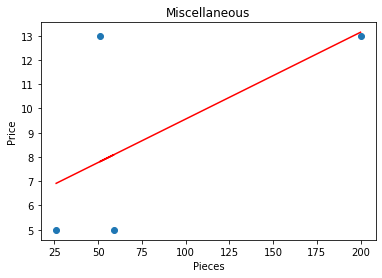

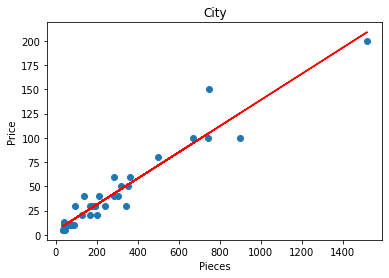

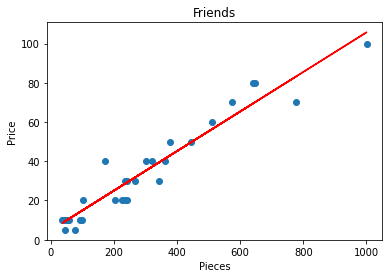

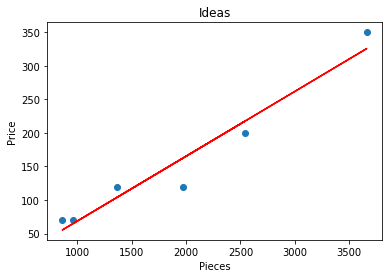

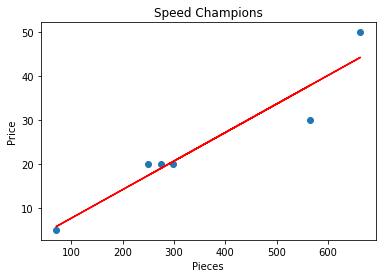

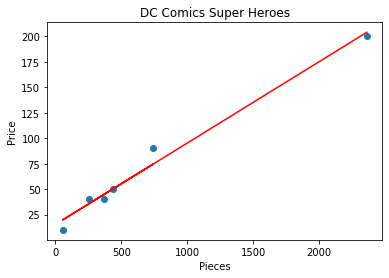

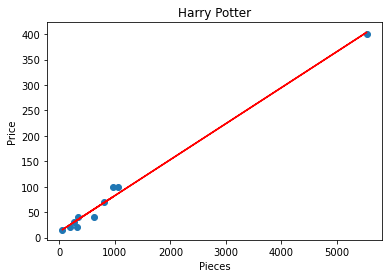

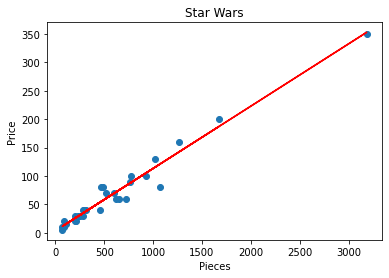

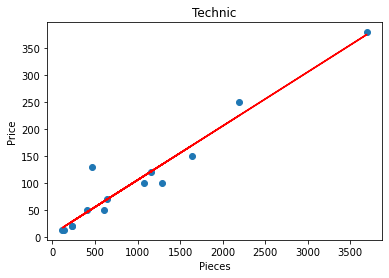

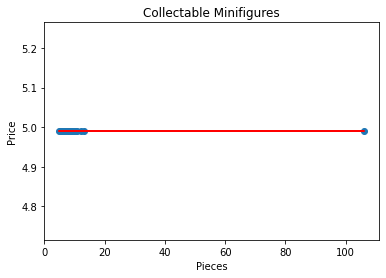

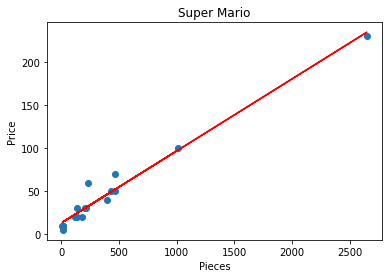

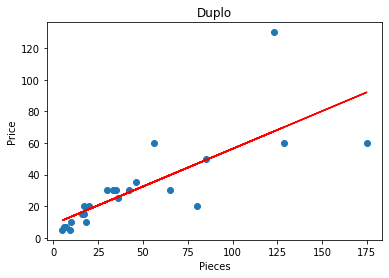

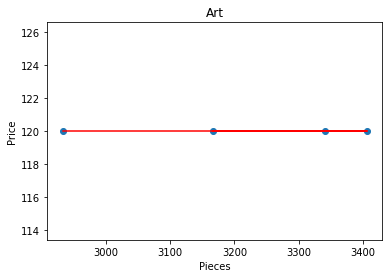

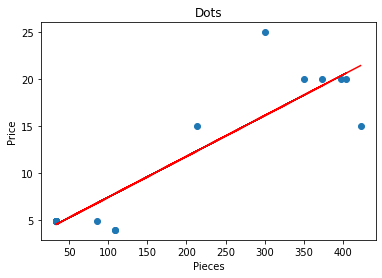

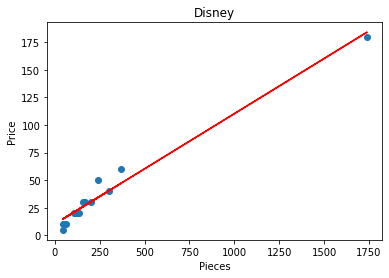

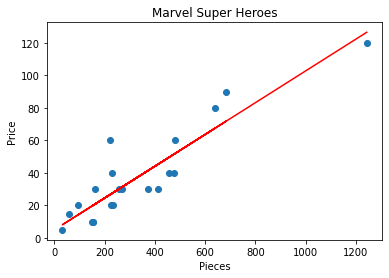

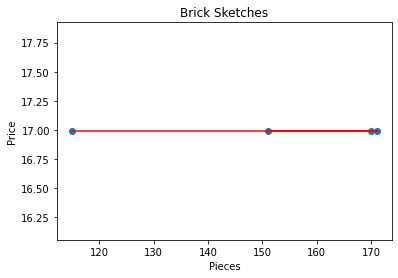

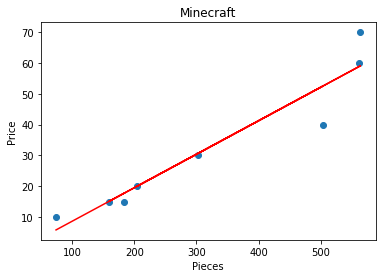

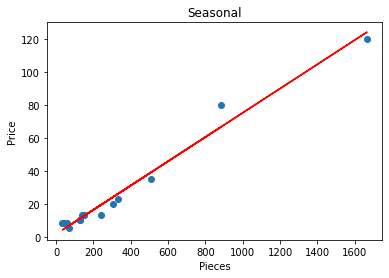

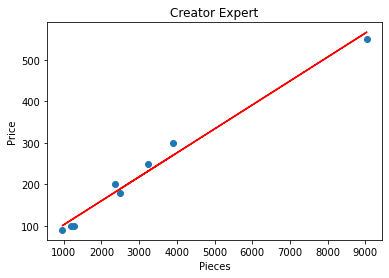

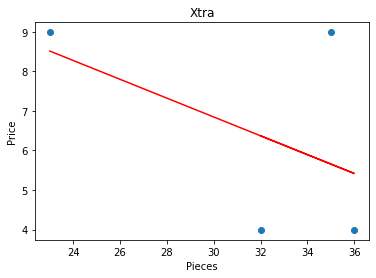

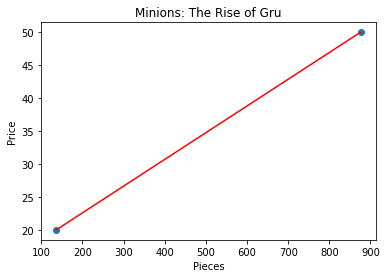

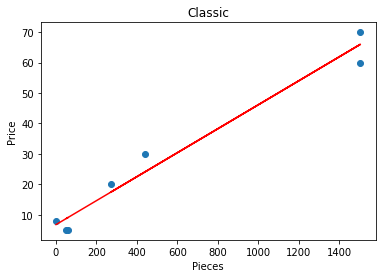

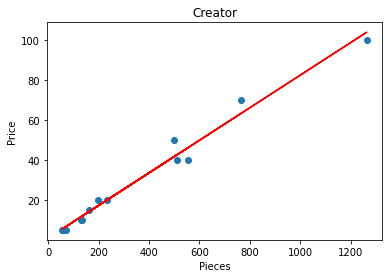

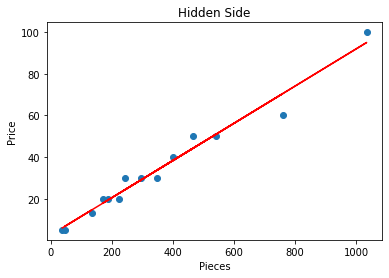

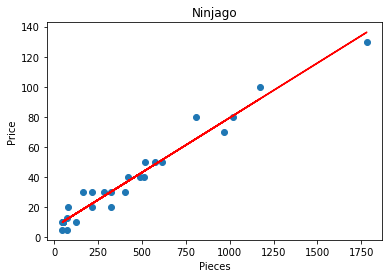

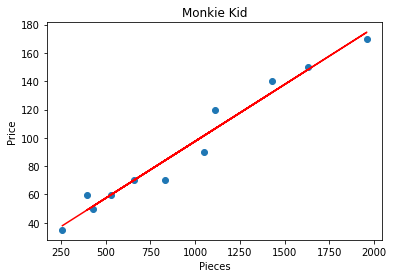

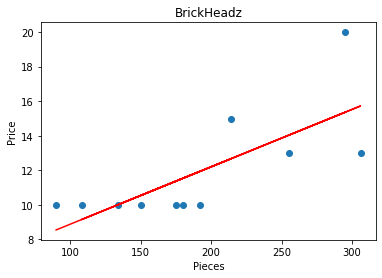

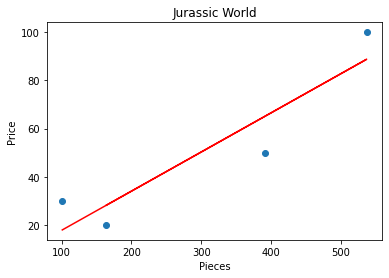

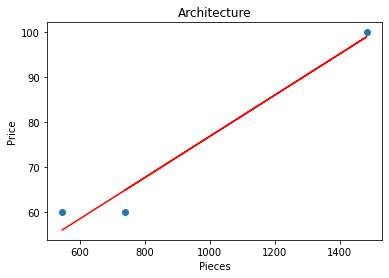

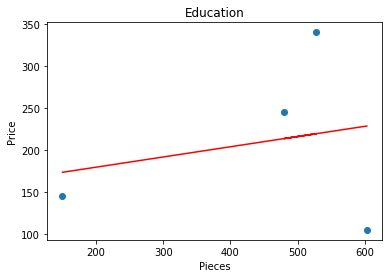

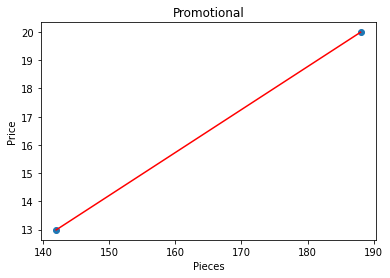

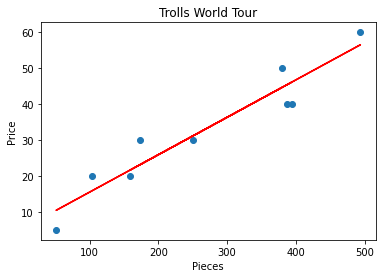

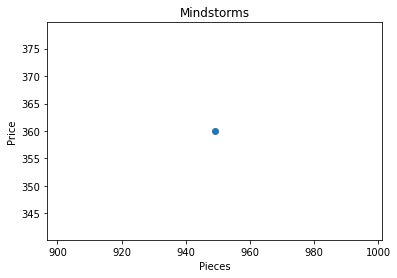

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



In [128]:
linear_regressor = LinearRegression()
statics = [['Weights','Mean','Median']]
themes = lego_cleaned.theme.unique()

for t in themes:
  theme = lego_cleaned.loc[lego_cleaned['theme'] == t]
  theme = theme[['pieces', 'price']]
  X = theme.iloc[:, 0].values.reshape(-1, 1)
  Y = theme.iloc[:, 1].values.reshape(-1, 1)
  price_per_piece = Y / X
  linear_regressor.fit(X, Y)
  hyp = linear_regressor.predict(X)
  m = linear_regressor.coef_[0][0]
  b = linear_regressor.intercept_[0]
  statics.append([(m, b), price_per_piece.mean(axis=0)[0], 
                  np.median(price_per_piece, axis=0)[0]])
  plt.scatter(X, Y)
  plt.plot(X, hyp, color='red')
  plt.title(t)
  plt.xlabel('Pieces')
  plt.ylabel('Price')
  plt.show()

statics = np.array(statics)

## Understaing the data obtained

So now that we already got the weights of the hypthosis function for every lego theme, we can now work with the median, mean and slope to get a better interpretation. 

We will obtain the average of the mean, median and slope to get a better interpretation.

In [129]:
price_per_piece = pd.DataFrame({'theme': themes, 'mean': pd.to_numeric(statics[1:, 1]), 
                                'median': pd.to_numeric(statics[1:, 2]), 
                                'slope': pd.to_numeric([stat[0] for stat in statics[1:, 0]])})
price_per_piece['average'] = price_per_piece.apply(lambda row : (row['mean']+row['median']+row['slope']) / 3, axis = 1)
price_per_piece

,theme,mean,median,slope,average
0,Miscellaneous,0.149039,0.138250,3.582605e-02,0.107705
1,City,0.161823,0.151212,1.349316e-01,0.149322
2,Friends,0.164877,0.132417,1.007599e-01,0.132685
3,Ideas,0.079428,0.079794,9.660946e-02,0.085277
4,Speed Champions,0.069916,0.071988,6.498872e-02,0.068964
5,DC Comics Super Heroes,0.128163,0.117365,7.986165e-02,0.108463
6,Harry Potter,0.110890,0.099239,7.070551e-02,0.093611
7,Star Wars,0.122427,0.120927,1.096197e-01,0.117658
8,Technic,0.111753,0.101367,1.002144e-01,0.104445
9,Collectable Minifigures,0.647581,0.623750,-3.023197e-33,0.423777


Plotting the average price per piece of every lego theme released on 2020.

In [135]:
fig = px.bar(price_per_piece, x="theme", y="average", color='average',
             labels={'average':'Average price per piece'})
fig.show()

## Making predictions

We will try to predict the price of a set that will be released on August 1, 2021. The set is the [The Bad Batch™ Attack Shuttle](https://www.lego.com/en-us/product/the-bad-batch-attack-shuttle-75314), it has 969 pieces and the retail price is \$99.99 USD. 

Using our linear regression model we can estimate the value as follows.

In [154]:
def hyp(pieces, theme):
  index = np.where(themes == theme)[0][0] + 1 # +1 because in the array of statics we added the vector that represents the weights, median and mean.
  return (statics[index][0][0]*pieces) + statics[index][0][1]

pieces = 42
theme = 'Star Wars'
print(hyp(pieces, theme))

8.159516772269885


The predict price of \$109.77 USD it is quite close considering that we do not have much data. It is important to know that they are \$109.77 USD as of 2020, that due to economy factors the value of those dollars is lower in 2021 in terms of acquisitive power.

## Final thoughts

There are a lot of impresive results. For example, Lego City, whose IP belongs to Lego, is more expensive than the IP for Minecraft! Also, the education theme is way more expensive than the majority themes, which is a thing i didn't expect at all. There are other things that make more sense, like for example Mindstorms, where the sets not only uses simple blocks, but electric pieces as well.

What I think it's more impressive is Lego Duplo. Take, as an example, the Lego Duplo set of [Lightning McQueen's Race Day](https://www.lego.com/en-us/product/lightning-mcqueen-s-race-day-10924) where the price is \$29.99 USD for only 43 pieces! If you predict with the same pieces and, for example, the theme of Star Wars, using the model from above, you will obtain that the expected cost should be around \$8 USD. That's over \$20 USD difference! You could probably say that there are two cars (Lighting McQueen and Mater), but the rest 41 pieces are simple. Is the set worth it? I would say no, although children would probably say yes.